In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format',lambda x: '%.4f' % x)
plt.rcParams['figure.figsize'] = 10,10

In [3]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [48]:
import json
import requests, zipfile, io
import shapefile
from json import dumps

https://fred.stlouisfed.org/series/USNUM

https://www.stlouisfed.org/publications/regional-economist/second-quarter-2017/banking-deserts-become-a-concern-as-branches-dry-up

**Banking Deserts**
http://libertystreeteconomics.newyorkfed.org/2016/03/banking-deserts-branch-closings-and-soft-information.html

In [5]:
CSV_PATH = os.path.join('data', 'econ', 'US_num_of_banks.csv')
banks = pd.read_csv(CSV_PATH, index_col='DATE', parse_dates=['DATE'])

In [6]:
banks.head()

,USNUM
DATE,
1984-01-01,14400
1984-04-01,14383
1984-07-01,14389
1984-10-01,14391
1985-01-01,14381


In [7]:
CSV_PATH = os.path.join('data', 'econ', 'LSE_banking_deserts_2014.csv')
bank_locs = pd.read_csv(CSV_PATH, encoding='latin1', header=4)
bank_locs.head()

,Year,geoid2000,tract_latitude,tract_longitude,banking_desert
0,2014,1001020900,32.6444,-86.5012,1
1,2014,1001021000,32.6313,-86.7568,1
2,2014,1001021100,32.4502,-86.7156,1
3,2014,1003010100,31.1225,-87.7664,1
4,2014,1003010400,30.7260,-87.6184,1


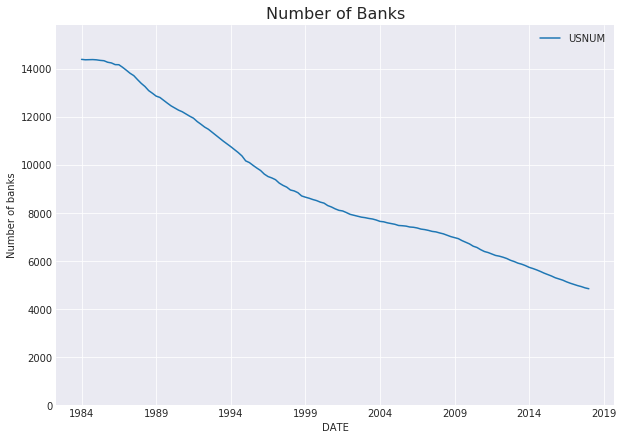

In [27]:
with sns.axes_style("darkgrid"):
    ax = banks.plot(figsize=(10,7))
    ax.set_title('Number of Banks', fontsize=16)
    ax.set_ylabel('Number of banks')
    ax.set_ylim([0, 1.1*banks.values.max()])

14400

In [ ]:
url = 'http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_20m.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

In [ ]:
file_list = z.namelist()

In [31]:
SHP_PATH = os.path.join('maps', 'cb_2016_us_county_20m.shp')
sf = shapefile.Reader(SHP_PATH)

In [46]:
fields = sf.fields[1:]
field_names = [field[0] for field in fields]

In [47]:
field_names

['STATEFP',
 'COUNTYFP',
 'COUNTYNS',
 'AFFGEOID',
 'GEOID',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER']

In [53]:
buffer = []
for sr in sf.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type='Feature', geometry=geom, properties=atr)) 

geoJSON_PATH = os.path.join('maps', 'cb_2016_us_county_20m.json')
with open(geoJSON_PATH, 'w') as f:
    f.write(dumps({"type": "FeatureCollection",\
                   "features": buffer}, indent=2) + "\n")

In [33]:
 create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

In [34]:
len(shapes)

3220

In [36]:
shape_recs = sf.shapeRecords()

In [45]:
shape_recs[51].record

['31',
 '151',
 '00835897',
 '0500000US31151',
 '31151',
 'Saline',
 '06',
 1486698709,
 5934626]

In [60]:
us_map = folium.Map(location=[41,-97],
                    zoom_start=4,
                    tiles='Stamen Toner')

# instantiate a feature group for the incidents in the dataframe
bank_deserts = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, des in zip(bank_locs.tract_latitude, bank_locs.tract_longitude, bank_locs.banking_desert):
    bank_deserts.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
us_map.add_child(bank_deserts)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [62]:
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

In [63]:
tips = sns.load_dataset("tips")

In [64]:
type(tips)

pandas.core.frame.DataFrame

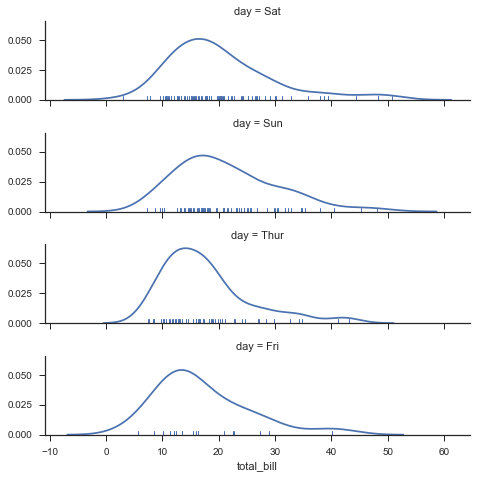

In [65]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

In [66]:
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')